Q1. What is deep learning, and how is it connected to artificial intelligence?
- Deep learning is a subset of machine learning and artificial intelligence that uses neural networks with many layers to model complex patterns in data.

Q2. What is a neural network, and what are the different types of neural networks?
- A neural network is a computational model inspired by the human brain, consisting of interconnected nodes (neurons). Types include feedforward, convolutional, recurrent, and generative adversarial networks.

Q3. What is the mathematical structure of a neural network?
- A neural network is composed of layers of neurons, each performing weighted sums of inputs followed by an activation function, typically represented as matrix multiplications and nonlinearities.

Q4. What is an activation function, and why is it essential in neural networks?
- An activation function introduces non-linearity into the network, enabling it to learn complex patterns beyond linear relationships.

Q5. Could you list some common activation functions used in neural networks?
- Common activation functions include ReLU, Sigmoid, Tanh, and Softmax.

Q6. What is a multilayer neural network?
- A multilayer neural network has more than one layer of neurons (hidden layers) between input and output, allowing it to model more complex functions.

Q7. What is a loss function, and why is it crucial for neural network training?
- A loss function measures the difference between predicted and actual values, guiding the optimization process during training.

Q8. What are some common types of loss functions?
- Common loss functions include Mean Squared Error, Cross-Entropy Loss, and Hinge Loss.

Q9. How does a neural network learn?
- A neural network learns by adjusting its weights using optimization algorithms to minimize the loss function, typically through backpropagation.

Q10. What is an optimizer in neural networks, and why is it necessary?
- An optimizer updates the weights of the network to minimize the loss function, enabling the network to learn from data.

Q11. Could you briefly describe some common optimizers?
- Common optimizers include Stochastic Gradient Descent (SGD), Adam, RMSprop, and Adagrad.

Q12. Can you explain forward and backward propagation in a neural network?
- Forward propagation computes the output of the network, while backward propagation calculates gradients and updates weights to minimize loss.

Q13. What is weight initialization, and how does it impact training?
- Weight initialization sets the starting values of network weights, impacting convergence speed and the ability to escape local minima.

Q14. What is the vanishing gradient problem in deep learning?
- The vanishing gradient problem occurs when gradients become too small during backpropagation, slowing or stopping learning in deep networks.

Q15. What is the exploding gradient problem?
- The exploding gradient problem occurs when gradients become too large, causing unstable updates and potentially diverging weights.

In [13]:
# Q16. How do you create a simple perceptron for basic binary classification?
import numpy as np
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size + 1)
    def predict(self, x):
        x = np.insert(x, 0, 1)
        return 1 if np.dot(self.weights, x) > 0 else 0
    def train(self, X, y, epochs=10, lr=0.1):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                update = lr * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
# Example usage
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
p = Perceptron(2)
p.train(X, y)
print([p.predict(xi) for xi in X])

[0, 0, 0, 1]


In [14]:
# Q17. How can you build a neural network with one hidden layer using Keras?

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Q18. How do you initialize weights using the Xavier (Glorot) initialization method in Keras?
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.layers import Dense
layer = Dense(8, activation='relu', kernel_initializer=GlorotUniform())

In [16]:
# Q19. How can you apply different activation functions in a neural network in Keras?
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [17]:
# Q20. How do you add dropout to a neural network model to prevent overfitting?
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [18]:
# Q21. How do you manually implement forward propagation in a simple neural network?
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([0.5, -0.6])
bias = 0.1
outputs = sigmoid(np.dot(X, weights) + bias)
print(outputs)

[0.52497919 0.37754067 0.64565631 0.5       ]


In [19]:
# Q22. How do you add batch normalization to a neural network model in Keras?
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

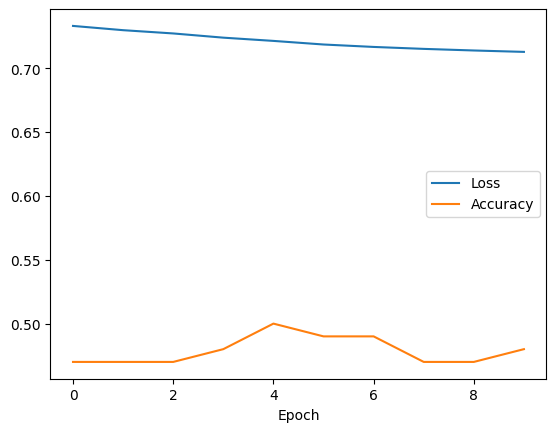

In [20]:
# Q23. How can you visualize the training process with accuracy and loss curves?
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
X = np.random.rand(100, 4)
y = np.random.randint(0, 2, 100)
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, verbose=0)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
# Q24. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients?
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(clipvalue=1.0), loss='binary_crossentropy')

In [22]:
# Q25. How can you create a custom loss function in Keras?
import tensorflow as tf
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
model.compile(optimizer='adam', loss=custom_loss)

In [23]:
# Q26. How can you visualize the structure of a neural network model in Keras?
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(1, activation='sigmoid')
])
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
